<a href="https://colab.research.google.com/github/arnoldjames98/arnoldjames98.github.io/blob/main/systemDynamicsII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Biodegradable Seed Spreading Robot](https://arnoldjames98.github.io/)
# System Dynamics II

The point of this assignment is to re-consolidate everything we have learned about our system back into our dynamic model. It now includes:

*   **At least one “compliant” element**: we have added the compliance of our three folding joints in the mechanism
*   **All unknown parameters determined and included**: we characterized the stiffness and damping of our selected material (thin cardboard)
*   **Joint or system-level damping determined**: the experimental stiffness and damping calculations are presented in this report
*   **An actuator model or stored energy source**: an experiment was performed to characterize our input wind turbine and gear mechanism
*   **Ground constraints considered**: we decided to not disconnect our ground link from the base frame, and we have included our justification in this report
*   **Valid initial condition**: we have maintained our code for finding a valid intial condition

### Progress Made since System Dynamics I

A number of important tasks were performed last week by indivually by separate members of the team. Our main goal was to experimentally test how our robot will be built so that we could add more information to our dynamics model.

#### Selection of a Compliant Element

To determine which elements should be modeled with compliance, we needed to figure out which joints in our mechansism would be made by folding material, and which joints would need to be taped or need to allow for full rotation. Therefore, we needed to create a system level prototype to understand how we could make the Klaan linkage mechanism using foldable robots techniques.

In the following video, a video of a system level prototype of the robot can be seen. This prototype is too heavy to by supported by the legs since a gear mechanism was made with somewhat heavy plastic gears, however, this prototype shows how the Klaan Mechanism was made using foldable techniques, and shows the most up-to-date prototype. In this prototype, all the links in the Klaan linkage mechanism were cut out separately and then taped together as needed, but from this prototyping exercise, it was much easier to identify which joints could be replaced by folding the material itself rather than using tape.

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UrNlfwX9GD0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

As mentioned previously, all of the joints in the mechanism were made by either taping together pieces of carboard (so the tape material is what is defining the compliance of the joints) or a rotating wheel and axel joint had to be used. A full diagram of the mechanism can be seen in the figure below. Note that this is the same diagram used in previous assignments, except that the triangular links are replaced by just two sides of the triangular link. While prototyping the full system, it was clear that not all three sides of the trianglular links were necessary, however there is no change in any of the measurements or kinematics of the mechanism. In our first iteration of the full system prototype, we used perpendicular pieces of carboard to constrain our non-straight links such as the blue, red, and purple links. 

![Mechanism Drawing - Updated](https://raw.githubusercontent.com/arnoldjames98/arnoldjames98.github.io/main/images/updatedDiagram.png)

We characterized the stiffness and damping of our cardboard material, so we need to determine which joints will be made out of this cardboard material with folding hinges. Since there are multiple interconnected loops (four bar and a five bar loop), there is not a way to make all the joints foldable without introducing undesireable complexity. For example, consider p6 on the diagram above. Material is required along LE6, L56, and L63, and these three components cannot be easily created with a foldable joint, but taping the red link to the blue link can be done very easily. However, taping all the joints is not necessary (consider p5, where a simple fold provides the desired effect).

Therefore, one of our goals in this assignment is to identify which joints can be easily manufactured using foldable technqiues and then add the compliance of the material at these joints. There are many different places where compliance could be considered (within the cardboard links, at the taped joints), but the folded joints are of the highest importance for future work on the manufacturing of our prototype. Additionally, it is possible that optimizing the stiffness at these foldable joints could improve our robot's gait, so it is a good candidate for a part of our model to add compliance to.

From the creation of our system level prototype, we identified three main joints can can be made by folding our cardboard material: p5, p4, and p2. These joints were identified by planning out the required folds and cuts for the next iteration of our prototype where we do not cut out each link individually. A diagram showing the planned cuts, folds, and how the links will be attached is included below:

![Mechanism Foldable Design](https://raw.githubusercontent.com/arnoldjames98/arnoldjames98.github.io/main/images/foldCutPlan2.png)

Note that the colors on this diagram are used to match the colors on previous diagrams of the mechansim. In the prototype, two Klaan Linkage mechanisms are attached to the purple ground link, but just one is shown here for simplicity. In this diagram, the blue, green, purple, and orange links can all be created by cutting out a single piece of cardboard. While dashed lines indicate locations on the cardboard that are folded, and sectors are shown above the folds that will be constrainted to be rigid using a perpendicular piece of cardboard (as can be seen in the video of the prototype). The red link is cut as a separate piece that can be taped to the main foldable part of the mechanism, and the red link is also attached to a pin connected to a wheel with a radius equal to the length of the "yellow link." From this diagram, the seven joints defining the mechansim (p0-p6) are characterized to show what material they will be made out of.


**Table I. Mechanism Lengths**

| Joint | Material/Method | Justification
| --- | --- | --- |
| p0 | Rotating Axel | Input to the system must allow periodic rotation so cannot be made with a foldable hinge |
| p1 | Rotating Axel | Also must allow periodic rotation |
| p2 | Cardboard Fold | Easiest method is folding |
| p3 | Taped | Located on separate red link |
| p4 | Cardboard Fold | Easiest method is folding |
| p5 | Cardboard Fold | Easiest method is folding | 
| p6 | Taped | Located on separate red link |


Therefore, p2, p4, and p5 will be considered to be made out of the same material as the links. The impedance properties of this material has been characterized, and the values found experimentally will be added to the model. Future work could consider modeling the taped hinges or the bending within the links, but we decided modeling the folable hinges in the cardboard would be the most important. Additionally, the stiffness of this hinges can be tuned adding or removing material from the joints, so it presents a full defined optimization problem for future work in improving the robot's gait. A diagram indicating the foldable joints on the main foldable piece of cardboard is shown below:

![Mechanism Foldable Design 2](https://raw.githubusercontent.com/arnoldjames98/arnoldjames98.github.io/main/images/foldCutPlan3.png)

#### Stiffness Charaterization

First the Solidworks FEA was created to show the behavior of our selected material when load is applied. The first image is the vonMises Analysis while Displacement is the second. Next, the Cantilever Beam experiment was performed to show in real time how different materials would bend under stress. Deflection was recorded when each weight was placed on the beam. One example of the experiment is shown in the third image with the scissors. From here, Young's Modulus was calculated for each of the different weights for the rigid material. After Young's Modulus was calculated, it was used to calculate the stiffness for the blue link (p2, p4, and p5) that touches the ground, since those joints will be made out of cardboard.
![Mechanism Drawing - Updated](https://raw.githubusercontent.com/arnoldjames98/arnoldjames98.github.io/main/images/vonMises.png)
![Mechanism Drawing - Updated](https://raw.githubusercontent.com/arnoldjames98/arnoldjames98.github.io/main/images/Displacement.png)
![Mechanism Drawing - Updated](https://raw.githubusercontent.com/arnoldjames98/arnoldjames98.github.io/main/images/CantileverExperiment.jpg)

Code for Stiffness

slope:  0.009673636363636363


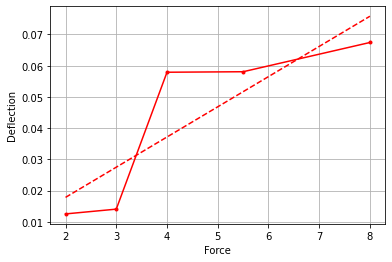

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy
import numpy as np
from sympy import pi
from sympy import integrate
import pandas as pd
from scipy.stats import linregress

b,h,theta,P,L,E,I,x,w,M,q,p,A,B,C,D,p0,M0=sympy.symbols('b,h,theta,P,L,E,I,x,w,M,q,p,A,B,C,D,p0,M0')

x_axis = [2, 3, 4, 5.5, 8] # mass of various loads (oz)
xt = np.array(x_axis)
y_axis = [0.0125, 0.01403, 0.0579, 0.05806, 0.06743] # deflection numbers for rigid cardboard (m)
yt = np.array(y_axis)
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
def a_predict(x_axis):
    return intercept + slope*x_axis

x_min, x_max = min(x_axis), max(x_axis)
a_min, a_max = a_predict(x_min), a_predict(x_max)

plt.plot(xt, intercept + slope*xt, 'r--')

print("slope: ", slope)
plt.plot(x_axis, y_axis, '.r-')
plt.xlabel('Force')
plt.ylabel('Deflection')
plt.grid(True)
plt.show()



In [ ]:
def plot_x(w,subs1=None):
    subs1 = subs1 or {}
    w = w.subs(subs1) 
    unit = dict([(item,1) for item in w.atoms(sympy.Symbol) if item!=x])
    unit.update(subs1)
    w_num = w.subs(unit)
    f_w = sympy.lambdify(x,w_num)

    xn = np.r_[0:unit[L]:100j]
    yn = f_w(xn)

    plt.plot(xn,yn)
    plt.axis('equal')

In [ ]:
#Computed moment of beam as function of the loading 
b = 0.125 # meters
h = 0.025 # meters
Ixx = (1/12)*b*h**3
Iyy = (1/12)*h*b**3
MaxDeflect = [0.0125, 0.01403, 0.0579, 0.05806, 0.06743]
d = np.array(MaxDeflect)
P = [2, 3, 4, 5.5, 8]
p = np.array(P)
E = ((b**3)*p)/(d * 3*(Ixx))
E2 = ((b**3)*4.5)/(0.041984 * 3*(Ixx)) # 4.5 and 0.041984 are the average weight and deflection respectively
rounded = np.round(E, 2)
print("Young's Modulus:\n", rounded)
rounded2 = np.round(E2, 2)
print("Average Young's Modulus:\n", rounded2)
Stiffness = E2 * Ixx
print("Stiffness:\n", Stiffness)
M_dd = np.dot(p, p) 

Young's Modulus:
 [640000.   855310.05 276338.51 378918.36 474566.22]
Average Young's Modulus:
 428734.76
Stiffness:
 0.06978104754192073


#### Damping Characterization 

In order to solve for the dampening of one of the joints of the system I set up the test experiment as detailed in the tracker tutorial. After cutting up the pieces of cardboard that are being used, they were set up. I lifted the joint up to be parallel with the table and then released the joint while recording. I then used the tracker software to track where the joint traveled over time. The distance between the two calibration points were 6.75 inches while the distance from the camera was 12 inches. I converted these measurements to meters before inputting them into the tracker software. As desired, this system created a dampened oscillation that were gathered from the data collected from the tracker.

I could then calculate the damping constant from this dampened oscillation using the following equations.

Td=time/number of oscillations=(3.9-2.74)/4=0.29
d=2/Td=2/0.29=21.66
=1/n*ln(X0/Xn)=1/5ln(0.0164/0.00228)=0.394
=/(42+2)0.5=0.0626

The damping constant that was found was a value of 0.0626. 
Lastly, the data was extracted and interpolated which was done by using Aukes’ code as found below. The graphs that were obtained are also detailed below as well as the raw data that is included..








#### Energy Source and Actuator Charaterization

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/FyguxYbtsFA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

The main unknown about this wind turbine mechanism is how much torque it can produce at the input link to the Klaan mechanism. An experiment was performed to find the stall torque of the motor, which represents the maximum torque that the power source can produce. A portable room fan was used to simulate the windy conditions required for the wind turbine to spin. Then weight was added a string attached to the input gear. As the gear spun, the radius of the winding would increase until the point when the torque caused by the weight would cause the mechanism to stall. This method was selected by following the instructions at the following link: https://scienceprog.com/easy-way-to-measure-motor-torque/. A video of the experiment when suffient weight (pencils tied to the end of the string) caused the wind turbine "motor" to stall.

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/bqz16L2NnmQ?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Then, the weight (29 g) and winding radius (1.75cm) were measured as shown in the image below:
![Torque Experiment](https://raw.githubusercontent.com/arnoldjames98/arnoldjames98.github.io/main/images/torqueExp.png)

Finally, the torque output of the mechansims could be calculated as follows: torque = (0.029 kg)(0.0175 m)(9.81 m/s^2) = 0.00498 Nm. Note that this value is extremely close to the value estimated that was required for the crab in the [*Biomechanics Background and Initial Specifications*](https://arnoldjames98.github.io/assignment2) assignment of 0.00513 Nm. Therefore, we will use 0.00498 Nm as the estimated constant input torque for this assignment. In the full system prototype, additional gears of the same gear ratio were connected to the gear that the above experiment was performed on. This implies that the current wind turbine design may only provide enough torque to move a single leg, meaning that our power source will likely need to be updated in the future.

#### Disconnecting Ground Link from Base Frame

We have decided to not remove the ground/purple link from the base frame since removing it would greatly complicate our dynamic model. Disconnecting the ground link from the base frame would require considerations on how the other legs of the robot support the robot during locomotion. Without the other legs of the robot supporting the robot, a dynamic model of a single leg disconnected from the ground would just fall over since there are no other legs supporting the robot. We considered adding additional constraints to the single leg model to prevent the leg from tipping over, but setting these constraints correctly would be highly dependent on how the ground/purple link will move during locomotion (i.e., the gait of the crab and weight of the body would affect how the ground/purple link moves over time). Modeling a single leg grounded allows us to still model the compliance and ground reaction effects of the robot moving, so we believe this is a reasonable modeling assumption.

#### Additional Improvements to Dynamics Model



*   We have added a floor constraint so we can model the effect of the crab's leg hitting the ground.





---



### Improved Dynamics Model

Since the prototype was built to scale, none of the mechanism lengths are changed from the previous assignment.


**Table I. Mechanism Lengths**

| Length | Rigid Body | Measurement (m)
| --- | --- | --- |
| L10 | Yellow | 0.03 |
| L02 | Purple | 0.0689 |
| L42 | Purple | 0.0973 |
| L40 | Purple | 0.0737 |
| L31 | Red | 0.066 |
| L61 | Red | 0.1236 | 
| L63 | Red | 0.0584 |
| L54 | Green | 0.0579 |
| L32 | Orange | 0.0359 |
| L56 | Blue | 0.1004 |
| L5E | Blue | 0.1940 |
| LE6 | Blue | 0.1004 |

**Table II. Mechanism Masses**

| Rigid Body | Mass (kg)
| --- | --- |
| Yellow | 0.000179 |
| Purple | 0.00144 |
| Red | 0.000746 |
| Green | 0.000347 |
| Orange | 0.000215 |
| Blue | 0.00120 |

*Note: The derivation of these mass values is included in the code below. It is based on the weight of cardstock paper.*

Show plots inline and ensure that pynamics is installed.

In [ ]:
%matplotlib inline
!pip install pynamics

Import all required packages. Packages related to dynamics are commented out since they are not needed for this assignment, but will be used in the future.

In [ ]:
import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body # New for this assignment
from pynamics.dyadic import Dyadic # New for this assignment
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle # New for this assignment
import pynamics.integration
import sympy
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
from pynamics.constraint import Constraint # New for this assignment
import scipy.optimize

Create a pynamics system where the mechanism is located.

In [ ]:
system = System()
pynamics.set_system(__name__,system)

Declare all length constants and ground coordinate locations.

In [ ]:
# All lengths converted to meters from the previous assignment
# Put all meaured lengths in meters in a list so that if we chose to change these
# in the future, they can all be scaled up or down with a single multiplier
allLengths = [0.03, 0.066, 0.0359, 0.068877, 0.12363, 0.1004, 0.0579, 0.073736, \
              0.0584, 0.0973, 0.1004, 0.19396]

groundCoords = [-0.066, -0.0197, -0.026, 0.069]

lengthScale = 1 # Default is 1, means that the measurements in allLengths and groundCoords will be unchanged from above

# Python's fancy way of scaling each element in the list
allLengths = [x * lengthScale for x in allLengths]
groundCoords = [x * lengthScale for x in groundCoords]

# From Loop Closure Eq. #1
l_10 = Constant(allLengths[0],'l_10',system)
l_31 = Constant(allLengths[1],'l_31',system)
l_32 = Constant(allLengths[2],'l_32',system)
l_02 = Constant(allLengths[3],'l_02',system)

# From Loop Closure Eq. #2
#l_10 already is included in Eq. 1
l_61 = Constant(allLengths[4],'l_61',system)
l_56 = Constant(allLengths[5],'l_56',system)
l_54 = Constant(allLengths[6],'l_54',system)
l_40 = Constant(allLengths[7],'l_54',system)

# Other lengths
l_63 = Constant(allLengths[8],'l_63',system)
l_42 = Constant(allLengths[9],'l_42',system)

# End effector
l_E6 = Constant(allLengths[10],'l_E6',system)
l_5E = Constant(allLengths[11],'l_5E',system)

# Moved the coordinates of the ground link here since they need to be scaled
# the same has lengths
# Ground link coordinates
p2_x = Constant(groundCoords[0],'p2_x',system)
p2_y = Constant(groundCoords[1],'p2_y',system)
p4_x = Constant(groundCoords[2],'p4_x',system)
p4_y = Constant(groundCoords[3],'p4_y',system)

# Consider adding the constant angle constraints in the future

Declare all masses of the links

In [ ]:
# Found some masses by estimating the length/perimeters in m of the different links in Cree's prototype
# This means the "triangular links" are not considered as rigid bodies, but inside just the sides matter
# Note that the blue and red triangular links actually only include 2 of the three sides in Cree's prototype
allMasses = [0.0300, 0.0359, 0.0579, 0.1244, 0.2004, 0.2399]

# Assuming we use 300 g/m2 heavy cardstock and all links are about 0.02m width by the length
# 0.3 kg * 0.02 m = 0.006 kg * m
massScale = 0.006 # Converts the length or perimeter based mass estimates a more realistic value for cardstock

# Python's fancy way of scaling each element in the list
allMasses = [x * massScale for x in allMasses]

print("Link Masses:", allMasses)

mY = Constant(allMasses[0],'mY',system) # Mass of yellow input link
mO = Constant(allMasses[1],'mO',system) # Mass of orange link
mG = Constant(allMasses[2],'mG',system) # Mass of green link
mR = Constant(allMasses[3],'mR',system) # Mass of red link
mB = Constant(allMasses[4],'mB',system) # Mass of blue link
mP = Constant(allMasses[5],'mP',system) # Mass of purple groundlink

Link Masses: [0.00017999999999999998, 0.0002154, 0.0003474, 0.0007464, 0.0012024, 0.0014394]


Define forces in Newtons

In [ ]:
# Gravity in SI units
g = Constant(9.81,'g',system)

# Experimentally found value for damping
b = Constant(0.0626,'b',system)

# REPLACE THIS WITH THE EXPERIMENTALLY FOUND VALUE (there is currently a placeholder)
k = Constant(0.05,'k',system)

#### First, defining the inertias

In [ ]:
# Diagonal entries of the interia matricies
# For rectangular links: https://www.google.com/search?q=inertia+matrix+of+rectangle&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiskPO74YHvAhXwITQIHa09C7QQ_AUoAXoECBMQAw&biw=1440&bih=764#imgrc=pdWYree46q8xbM
# Where diagonal elements are (1/12 * mass * (lengthSideY^2 - lengthSideZ^2) for example
# The triangular links are bit trickier. I think we can do it in SolidWorks
# Note that the frames are defined in the sections below, but are important for 
# identifying which dimension is x (along frame), y (orthogonal to frame), or z (out of the page)

# TODO: Update these diagonal intertia matrix elements based on the geometry of Cree's prototype

# Inertia of yellow link (rectangle) w.r.t Y frame
Ixx_Y = Constant(1,'Ixx_Y',system)
Iyy_Y = Constant(1,'Iyy_Y',system)
Izz_Y = Constant(1,'Izz_Y',system)

# Inertia of orange link (rectangle)
Ixx_O = Constant(1,'Ixx_O',system)
Iyy_O = Constant(1,'Iyy_O',system)
Izz_O = Constant(1,'Izz_O',system)

# Inertia of green link (rectangle)
Ixx_G = Constant(1,'Ixx_G',system)
Iyy_G = Constant(1,'Iyy_G',system)
Izz_G = Constant(1,'Izz_G',system)

# Inertia of red link (two sides of triangle)
Ixx_R = Constant(1,'Ixx_R',system)
Iyy_R = Constant(1,'Iyy_R',system)
Izz_R = Constant(1,'Izz_R',system)

# Inertia of blue link (two sides of triangle)
Ixx_B = Constant(1,'Ixx_B',system)
Iyy_B = Constant(1,'Iyy_B',system)
Izz_B = Constant(1,'Izz_B',system)

# Inertia of purple link (three sides of triangle)
Ixx_P = Constant(1,'Ixx_P',system)
Iyy_P = Constant(1,'Iyy_P',system)
Izz_P = Constant(1,'Izz_P',system)

#### NOTE: Some additionally code from the kinematics assignment is needed to define the frames, since the center of masses require that the frames be defined.

Create the differentiable state variables, cooresponding to the joint angles (we might not need all of these depending on how we do the constraints)

In [ ]:
# Note: All angles are measured CCW

# Input state variable (angle of crank on yellow link)
qY,qY_d,qY_dd = Differentiable('qY',system) # Yellow input link, measured from base frame coordinates

# Other state variables (angles of the four undefined links)
# Note that the purple link is ground so is fully defined
qO,qO_d,qO_dd = Differentiable('qO',system) # Orange link w.r.t base frame
qG,qG_d,qG_dd = Differentiable('qG',system) # Green link w.r.t base frame

# Links defined w.r.t non-ground link (not connected to ground)
qR,qR_d,qR_dd = Differentiable('qR',system) # Red link w.r.t yellow link frame
qB,qB_d,qB_dd = Differentiable('qB',system) # Blue link w.r.t green link frame

# New angle for the compliant link#
#qNew,qNew_d,qNew_dd = Differentiable('qNew',system) # In the middle of the blue link

Initial guess for starting positions

In [ ]:
# TODO: We can measure the angles on our directly from our figure to make some guesses
initialvalues = {}
# Yellow link w.r.t base
initialvalues[qY]=130*pi/180 #130*pi/180 (positive) is the input for which I estimated the other angles
initialvalues[qY_d]=0

# Orange link w.r.t base (measure angle from the standard horizontal x-axis, the shape of the purple ground link is not needed here)
initialvalues[qO]=130*pi/180
initialvalues[qO_d]=0

# Green link w.r.t base (measure angle from the standard horizontal x-axis, the shape of the purple ground link is not needed here)
initialvalues[qG]=160*pi/180
initialvalues[qG_d]=0

# Red link w.r.t yellow link frame
initialvalues[qR]=30*pi/180
initialvalues[qR_d]=0

# Blue link w.r.t green link frame
initialvalues[qB]=60*pi/180
initialvalues[qB_d]=0

# New compliant blue link
#initialvalues[qNew]=30*pi/180
#initialvalues[qNew_d]=0

Retrieve state variables in the order they are stored in the system

In [ ]:
statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]

Create the main reference frames, with one cooresponding to each rigid link

In [ ]:
N = Frame('N') # Purple (ground) link

# Defined w.r.t to ground
Y = Frame('Y') # Yellow
O = Frame('O') # Orange
G = Frame('G') # Green

# Defined w.r.t to other links 
# Note that both are directed towards p6
# Important since this is how the angle representing the link is defined
R = Frame('R') # Red w.r.t yellow
B = Frame('B') # Blue w.r.t green

# Helpful additional frames for triangular links
# These frames define the constant angles within the triangular joints
R_to_p3 = Frame('R_to_p3') # Red w.r.t yellow (+ constant degrees to align x-axis with p3)
B_to_pE = Frame('B_to_pE') # Blue w.r.t green (+ constant degrees to align x-axis with pE)
B_plus_180 = Frame('B_plus_180') # Blue with x axis in opposite direction
R_from_p3 = Frame('R_from_p3') # Red rotated so that it can point from p3 to p6 (CW rotation)
B_from_p6 = Frame('B_from_p6') # Blue rotated so it can go from p6 to pE

Declare N as the Newtonian (fixed) frame

In [ ]:
system.set_newtonian(N)

Rotate frames about their z-axes so they align with the correct rigid link.

In [ ]:
# Frames cooresponding to joint angles
Y.rotate_fixed_axis_directed(N,[0,0,1],qY,system) # Yellow
O.rotate_fixed_axis_directed(N,[0,0,1],qO,system) # Orange
G.rotate_fixed_axis_directed(N,[0,0,1],qG,system) # Green
R.rotate_fixed_axis_directed(Y,[0,0,1],qR,system) # Red w.r.t yellow
B.rotate_fixed_axis_directed(G,[0,0,1],qB,system) # Blue w.r.t green

# Helpful frames for triangular joints
# 6.007 degrees from B frame to align axis with p3
R_to_p3.rotate_fixed_axis_directed(Y,[0,0,1],qR+6.007*pi/180,system) # Red w.r.t yellow
# 15 degrees from B frame to align axis with pE
B_to_pE.rotate_fixed_axis_directed(G,[0,0,1],qB+15*pi/180,system) # Blue w.r.t green
# B plus 180 (this comes in handy later when defining a vector in the opposite direction)
B_plus_180.rotate_fixed_axis_directed(G,[0,0,1],qB+180*pi/180,system) # Blue reversed
# R - 5.84 degrees (CW rotation) from p3 to p6
R_from_p3.rotate_fixed_axis_directed(Y,[0,0,1],qR-12.8*pi/180,system) # Red w.r.t yellow
# Rotate B frame 30 degrees CCW to go from p6 to pE

# Note that instead of qB+30 degrees, qNew is now there since we have a compliant joint within the blue link
B_from_p6.rotate_fixed_axis_directed(G,[0,0,1],qB+30*pi/180,system)

#### Now with the frames defined, the **center of masses** can be considered

In [ ]:
# Vectors representing the joint locations w.r.t N frame
# Fixed points on purple (ground) link
p0 = 0*N.x # P0 is at the origin
p2 = p2_x*N.x + p2_y*N.y # Coordinates given (in meters)
p4 = p4_x*N.x + p4_y*N.y # Coordinates given (in meters)

# Note that for all other points, they are still w.r.t N frame, but they can be defined from different directions/pathways
# Defining the same point from different directions/pathways is needed for constraints
# Points directly connected to ground
p1_from_p0 = p0 + l_10*Y.x
p3_from_p2 = p2 + l_32*O.x
p5_from_p4 = p4 + l_54*G.x

# Additional points (Consider alternative defnitions of these)
p6_from_p1 = p1_from_p0 + l_61*R.x
pE_from_p5 = p5_from_p4 + l_5E*B_to_pE.x # 15 degrees CCW from B frame x axis

# Alternate pathways to points (used to make LHS and RHS of loop equations defined differently)
p3_from_p1 = p1_from_p0 + l_31*R_to_p3.x # 6.007 degrees (CCW) from R frame x axis
p5_from_p6 = p6_from_p1 + l_56*B_plus_180.x # 180 degress (CCW) from B frame x axis
p6_from_p3 = p3_from_p2 + l_63*R_from_p3.x # -5.84 degress (CW) from R frame x axis
pE_from_p6 = p6_from_p3 + l_E6*B_from_p6.x

# List of points to that will be used for plotting 
# Doesn't matter which version of points like p1 we use since they will be constrained to be equal
points = [p0, p1_from_p0, p2, p3_from_p2, p4, p5_from_p4, p6_from_p1, pE_from_p6]

# Alternative list that works will with Dr. Aukes's plotting function
#points = [p0,p1_from_p0,p3_from_p1,p2,p4,p5_from_p4,p6_from_p1,pE_from_p6,p6_from_p1,p3_from_p1]

In [ ]:
# Center of mass for each link, requires information about frames
# For the triangular links, we will need to consider both the x and y components
# since the COM will not be located along any frame like for the straight joints where it is in the middle
# These ones are easy: just in the middle of the length along the correct frame
cmY= l_10/2*Y.x
cmO= p2+l_32/2*O.x
cmG= p4+l_54/2*G.x

# These ones need x and y components (Estimated based on solidworks)
# Note that in the future if dimensions change these need to be updated
cmR=p1_from_p0+0.06*R.x-0.01*R.y
cmB=p5_from_p4+0.08*B.x+0.03*B.y
cmP=-0.05*N.x+0.06*N.y

The next several lines compute the inertia dyadics of each body and define a rigid body on each frame.

In [ ]:
# Define the intertia w.r.t to the appropriate frames
IY = Dyadic.build(Y,Ixx_Y,Iyy_Y,Izz_Y)
IO = Dyadic.build(O,Ixx_O,Iyy_O,Izz_O)
IG = Dyadic.build(G,Ixx_G,Iyy_G,Izz_G)
IR = Dyadic.build(R,Ixx_R,Iyy_R,Izz_R)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IP = Dyadic.build(N,Ixx_P,Iyy_P,Izz_P) # Purple link is in Newtonian frame

# Define the bodies that describe the mass/inertial properties of each link
BodyY = Body('BodyY',Y,cmY,mY,IY,system)
BodyO = Body('BodyO',O,cmO,mO,IO,system)
BodyG = Body('BodyG',G,cmG,mG,IG,system)
BodyR = Body('BodyR',R,cmR,mR,IR,system)
BodyB = Body('BodyB',B,cmB,mB,IB,system)
BodyP = Body('BodyP',N,cmP,mP,IP,system)

# An alternative approach is to represent each mass as a particle at a certain point
#BodyC = Particle(pCcm,mC,'ParticleC',system)

#### **NOTE: We decided to include a constant torque input to the system, so that we could better show the gait of the crab mechanism. Therefore, our system does not fall down like a rag doll, but does spin. We talked to Dr. Aukes at office hours about this.**

Stiffness pre-loads are set to reasonable values for the various joint angles. Note that in this section it is not important since k is set to 0.

In [ ]:
# Stiffness equilibrium (where joint naturally wants to be) for each joint
# We will need to update the angles with ones that make sense based on how the paper joints are folded
#preloadY = Constant(130*pi/180,'preload0',system)
#preloadO = Constant(130*pi/180,'preload1',system)
#preloadG = Constant(160*pi/180,'preload2',system)
#preloadR = Constant(30*pi/180,'preload3',system)
#preloadB = Constant(60*pi/180,'preload4',system)

# Assumption: Stiffness equilibirium of folded cardboard is straight
preloadO = Constant(0*pi/180,'preloadO',system)
preloadG = Constant(0*pi/180,'preloadG',system)
preloadB = Constant(0*pi/180,'preloadB',system)

# Stiffness equilibrium of the compliant joint within the blue link
#preloadNew = Constant(30*pi/180,'preload4',system)

Adding the forces: note that in this section damping and stiffness are 0, so only the input torque and gravity cause changes to the system dynamics

The code turns the motor off after 5 seconds to show that the energy of the system decreases to zero due to the added dampening, friction, and compliance of the system.

In [ ]:
#Angular velocity brought from Triple Pendulum
#angular velocity between frames N and Y, Y and O , and O and G
wY = N.getw_(Y)
wR = Y.getw_(R)
wO = N.getw_(O)
wG = N.getw_(G)
wB = G.getw_(B)

#system.addforce(1*N.z,wY)
#shut motor off after 3 seconds
T = system.t-3
T_s = -(T-abs(T))
on = T_s/(2*T)
#motor at input link
#system.addforce(-1*N.z*on,wY)
#system.addforce(-0.00498*N.z*on,wY)
system.addforce(-4.98*N.z*on,wY) # Higher motor torque for testing

system.addforcegravity(-g*N.y)
system.addforce(-b*wB,wB)
system.addforce(-b*wG,wG)
system.addforce(-b*wR,wR)


# These are the three foldable joints
system.add_spring_force1(k,(qO-preloadO)*N.z,wO) # p2
system.add_spring_force1(k,(qG-preloadG)*N.z,wG) # p4
system.add_spring_force1(k,(qB-preloadB)*G.z,wB) # p5

# Adding a non-zero spring force (add this value to constants)
#system.add_spring_force1(100,(qNew-preloadNew)*G.z,wB)

#add floor collision
vpE= pE_from_p6.time_derivative(N,system)
y1 = pE_from_p6.dot(N.y)
k_constraint = Constant(1e4,'k_constraint',system)
b_constraint = Constant(1e5,'b_constraint',system)
f_floor1 = ((y1+0.075)**2)**.5 - (y1+0.075)
f_floor1_d = system.derivative(f_floor1)
system.addforce(-k_constraint*f_floor1*-N.y,vpE)
system.addforce(-b_constraint*f_floor1*vpE,vpE)
system.addforce(-b_constraint*f_floor1*f_floor1_d*-N.y,vpE)

Create a list of initial values ini0 in the order of the system’s state variables

In [ ]:
statevariables = system.get_state_variables()
ini0 = [initialvalues[item] for item in statevariables]

Create all the vector equation constraints (e.g., loop closure equations, rigid link constraints, etc.)

In [ ]:
# Loop closure equations (constraint to ensure all loops are equal to zero)
# Equation 1 (R02 + R10 + R31 = R32)
loopClosure1 = p3_from_p1 - p3_from_p2

# Equation 2 (R10 + R61 + R56 = R40 + R54)
loopClosure2 = p5_from_p4 - p5_from_p6

Convert the vector constraints into scalar equations that can be solved

In [ ]:
eq = [] # Initialize

# Loop closure equations
eq.append((loopClosure1).dot(N.x))
eq.append((loopClosure1).dot(N.y))

eq.append((loopClosure2).dot(N.x))
eq.append((loopClosure2).dot(N.y))

# Show the equations
print(eq)

# Take the derivatives
eq_d=[(system.derivative(item)) for item in eq]
eq_dd=[(system.derivative(item)) for item in eq_d] # Added for this assignment

# Show the derivatives
print(eq_d)

[l_10*cos(qY) - l_31*sin(qY)*sin(qR + 0.104841928167299) + l_31*cos(qY)*cos(qR + 0.104841928167299) - l_32*cos(qO) - p2_x, l_10*sin(qY) + l_31*sin(qY)*cos(qR + 0.104841928167299) + l_31*sin(qR + 0.104841928167299)*cos(qY) - l_32*sin(qO) - p2_y, -l_10*cos(qY) + l_54*cos(qG) + l_56*sin(qG)*sin(qB + 3.14159265358979) - l_56*cos(qG)*cos(qB + 3.14159265358979) + l_61*sin(qR)*sin(qY) - l_61*cos(qR)*cos(qY) + p4_x, -l_10*sin(qY) + l_54*sin(qG) - l_56*sin(qG)*cos(qB + 3.14159265358979) - l_56*sin(qB + 3.14159265358979)*cos(qG) - l_61*sin(qR)*cos(qY) - l_61*sin(qY)*cos(qR) + p4_y]
[l_32*qO_d*sin(qO) + qR_d*(-l_31*sin(qY)*cos(qR + 0.104841928167299) - l_31*sin(qR + 0.104841928167299)*cos(qY)) + qY_d*(-l_10*sin(qY) - l_31*sin(qY)*cos(qR + 0.104841928167299) - l_31*sin(qR + 0.104841928167299)*cos(qY)), -l_32*qO_d*cos(qO) + qR_d*(-l_31*sin(qY)*sin(qR + 0.104841928167299) + l_31*cos(qY)*cos(qR + 0.104841928167299)) + qY_d*(l_10*cos(qY) - l_31*sin(qY)*sin(qR + 0.104841928167299) + l_31*cos(qY)*cos(qR

Solve for a valid initial condition

In [ ]:
qi = [qY] # Yellow link is the input
qd = [qO, qG, qR, qB] # All other links are dependent on the input
constants = system.constant_values.copy()
defined = dict([(item,initialvalues[item]) for item in qi])
constants.update(defined)
eq = [item.subs(constants) for item in eq]
error = (numpy.array(eq)**2).sum()
f = sympy.lambdify(qd,error)

def function(args):
  return f(*args)
guess = [initialvalues[item] for item in qd]

result = scipy.optimize.minimize(function,guess)
if result.fun>1e-3:
    raise(Exception("out of tolerance"))
print("Tolerance:", result.fun)

ini = []

for item in system.get_state_variables():
    if item in qd:
        ini.append(result.x[qd.index(item)])
    else:
        ini.append(initialvalues[item])

#points = PointsOutput(points, constant_values=system.constant_values)
#points.calc(numpy.array([ini0,ini]))

Tolerance: 3.517101411278203e-09


In [ ]:
f,ma = system.getdynamics()
#Solving for Acceleration
func1,lambda1 = system.state_space_post_invert(f,ma,eq_dd,return_lambda = True)

2021-03-19 19:15:24,342 - pynamics.system - INFO - getting dynamic equations
2021-03-19 19:15:24,950 - pynamics.system - INFO - solving a = f/m and creating function
2021-03-19 19:15:24,960 - pynamics.system - INFO - substituting constrained in Ma-f.
2021-03-19 19:15:28,093 - pynamics.system - INFO - done solving a = f/m and creating function
2021-03-19 19:15:28,094 - pynamics.system - INFO - calculating function for lambdas


Adding Integration code

In [ ]:
#insert code here, some code copied and pasted from pendulum example
tol = 1e-12
tinitial = 0
tfinal = 10
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]
# Note: important to input a valid initial condition
states=pynamics.integration.integrate(func1,ini,t,rtol=tol,atol=tol, args=({'constants':system.constant_values},))

2021-03-19 19:15:28,104 - pynamics.integration - INFO - beginning integration
2021-03-19 19:15:28,106 - pynamics.system - INFO - integration at time 0000.00
2021-03-19 19:15:34,725 - pynamics.system - INFO - integration at time 0001.88
2021-03-19 19:15:41,354 - pynamics.system - INFO - integration at time 0002.87
2021-03-19 19:15:47,952 - pynamics.system - INFO - integration at time 0003.73
2021-03-19 19:15:54,527 - pynamics.system - INFO - integration at time 0005.78
2021-03-19 19:15:59,227 - pynamics.integration - INFO - finished integration


#### Plotting and Animation

Create a figure that shows how the state variables evolve over the time of the simulation. In other words, plot how are the links rotating over time.

<Figure size 432x288 with 0 Axes>

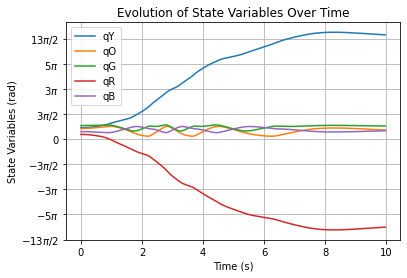

In [ ]:
plt.figure()
f,ax=plt.subplots(1)
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['yellow', 'orange', 'g', 'r', 'b']) +
                           cycler('linestyle', ['-', '-', '-', '-', '-'])))
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("State Variables (rad)")
artists = plt.plot(t,states[:,:5])
plt.title('Evolution of State Variables Over Time')

plt.legend(artists,['qY','qO','qG','qR','qB'])

# Function from https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
# Used to make tick marks show in units of pi
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(numpy.round(2 * value / numpy.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

# Makes the tick marks show units of pi
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

Prepare an animation of the mechanism's motion and show some of the frames

2021-03-19 19:15:59,760 - pynamics.output - INFO - calculating outputs
2021-03-19 19:15:59,788 - pynamics.output - INFO - done calculating outputs


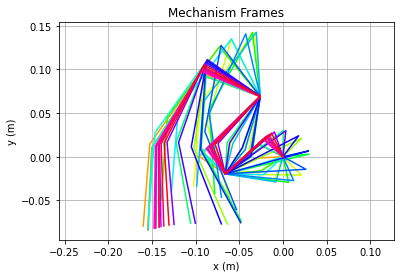

In [ ]:
# Make the colors make cycle through a large variety to show each frame
plt.rc('axes', prop_cycle=(plt.cycler('color', plt.cm.hsv(numpy.linspace(0, 1, fps)))))

points_output = PointsOutput(points,system)
y = points_output.calc(states)

points_output.plot_time(tfinal)
plt.title('Mechanism Frames')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()

Plot the energy of the system

2021-03-19 19:16:00,134 - pynamics.output - INFO - calculating outputs
2021-03-19 19:16:00,156 - pynamics.output - INFO - done calculating outputs


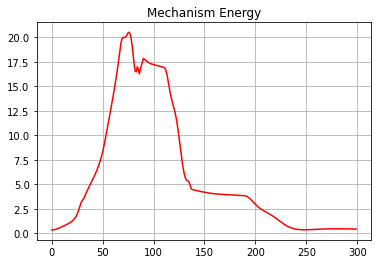

In [ ]:
KE = system.get_KE()
PE = system.getPEGravity(p0) - system.getPESprings()
energy_output = Output([KE-PE],system)
energy_output.calc(states)
energy_output.plot_time()
plt.title('Mechanism Energy')
plt.grid()

Plot an animation of the mechanism

In [ ]:
# Plots final frame of Animation and created object that is used for animation
points_output.animate(fps = fps,movie_name = 'render.mp4',lw=2,marker='o',color=(1,0,1,1),linestyle='-') #produces animation using matplotlib
plt.title('Mechanism Animation')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.close() # Hide the plot that just shows a single frame of the animation

from matplotlib import animation, rc
from IPython.display import HTML
HTML(points_output.anim.to_html5_video())

Creating a more easy to read animation (note: this code takes a long time to run. It creates an easier to understand animation, but does not provide any new information from the plot above)

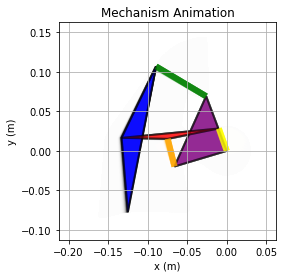

In [ ]:
from matplotlib.animation import FuncAnimation

def animate(i):
    # Hacky way to not show show every frame (semitransparent whitebox colors over old frames)
    white = plt.fill([-0.2, -0.2, 0.05, 0.05], [ -0.1, 0.15, 0.15, -0.1], facecolor='white', alpha=0.3)
    # Blue link
    blueLink = plt.fill([y[i][7,0],  y[i][6,0],  y[i][5,0]], [ y[i][7,1],  y[i][6,1],  y[i][5,1]], facecolor='blue', edgecolor="black",linewidth=2, alpha=0.6)
    # Blue link
    blueLink = plt.fill([y[i][7,0],  y[i][6,0],  y[i][5,0]], [ y[i][7,1],  y[i][6,1],  y[i][5,1]], facecolor='blue', edgecolor="black",linewidth=2, alpha=0.6)
    # Purple link
    purpleLink = plt.fill([ y[i][0,0],  y[i][2,0],  y[i][4,0]], [ y[i][0,1],  y[i][2,1],  y[i][4,1]], facecolor='purple', edgecolor="black",linewidth=2, alpha=0.6)
    # Red link
    redLink = plt.fill([ y[i][1,0],  y[i][3,0],  y[i][6,0]], [ y[i][1,1],  y[i][3,1],  y[i][6,1]], facecolor='red', edgecolor="black",linewidth=2, alpha=0.6)
    # Orange link
    orangeLink = plt.fill([ y[i][2,0],  y[i][3,0]], [ y[i][2,1],  y[i][3,1]], edgecolor="orange",linewidth=6, alpha=0.8)
    # Green link
    greenLink = plt.fill([ y[i][4,0],  y[i][5,0]], [ y[i][4,1],  y[i][5,1]], edgecolor="green",linewidth=6, alpha=0.8)
    # Yellow link
    yellowLink = plt.fill([ y[i][0,0],  y[i][1,0]], [ y[i][0,1],  y[i][1,1]], edgecolor="yellow",linewidth=6, alpha=0.8)
    plt.axis('scaled')
    
    return blueLink

fig, ax = plt.subplots()

plt.title('Mechanism Animation')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()

anim = FuncAnimation(fig, animate, frames=t.size, interval=tstep*1000, blit=True)
HTML(anim.to_html5_video())